In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Canada.csv')
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
df.shape

(195, 39)

In [4]:
df.set_index('Country', inplace=True)

In [5]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
df.shape

(195, 38)

In [7]:
# Lista com os anos 1980 a 2013
# Vamos precisar mapear para string para poder plotar os graficos
years = list(map(str, range(1980, 2014)))

In [8]:
# Boxplot
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


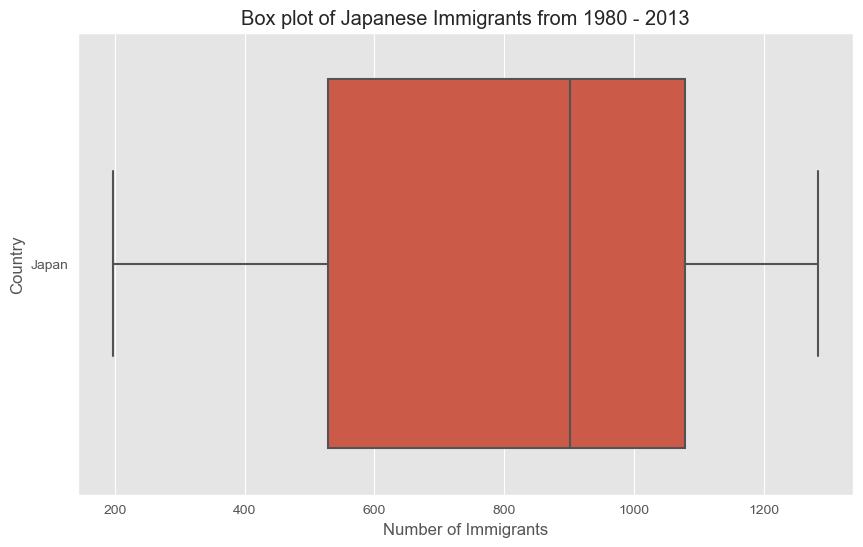

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_japan, orient='h')
ax.set_title('Box plot of Japanese Immigrants from 1980 - 2013')
ax.set_xlabel("Number of Immigrants")
plt.show();

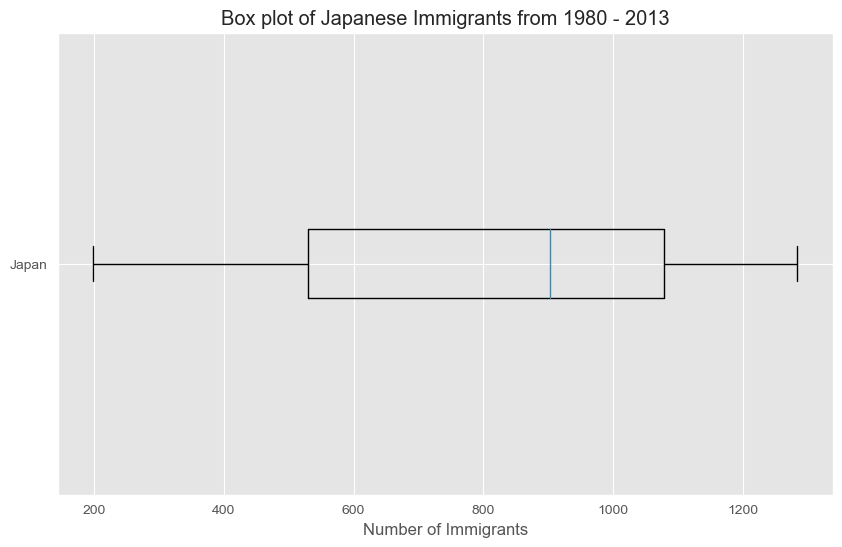

In [10]:
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura
plt.boxplot(df_japan.values, vert=False)  # Criando o boxplot horizontal

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.xlabel("Number of Immigrants")  # Definindo o rótulo do eixo x
plt.yticks([1], ['Japan'])  # Ajustando o rótulo do eixo y

plt.show();

In [11]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [12]:
# Comparacao de China e India
df_ci = df.loc[['China', 'India'], years].transpose()
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [13]:
df_ci.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


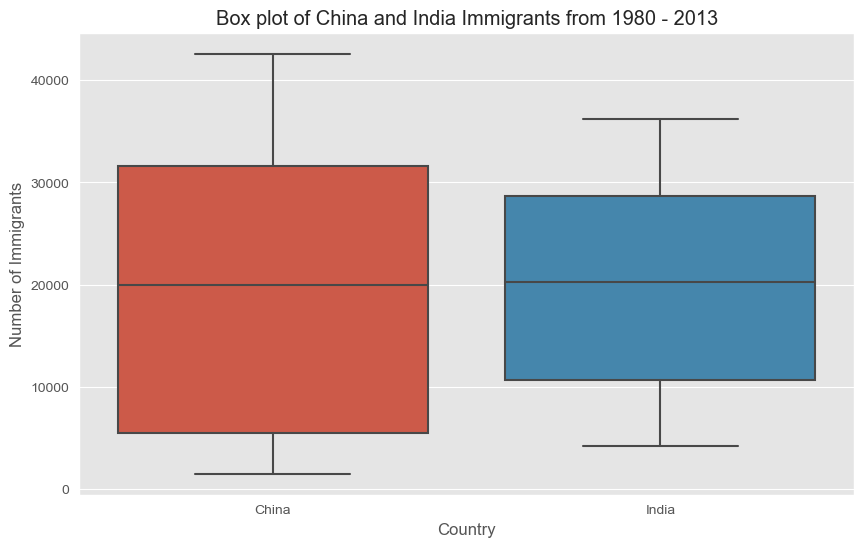

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_ci)
ax.set_title("Box plot of China and India Immigrants from 1980 - 2013")
ax.set_ylabel("Number of Immigrants")
plt.show();

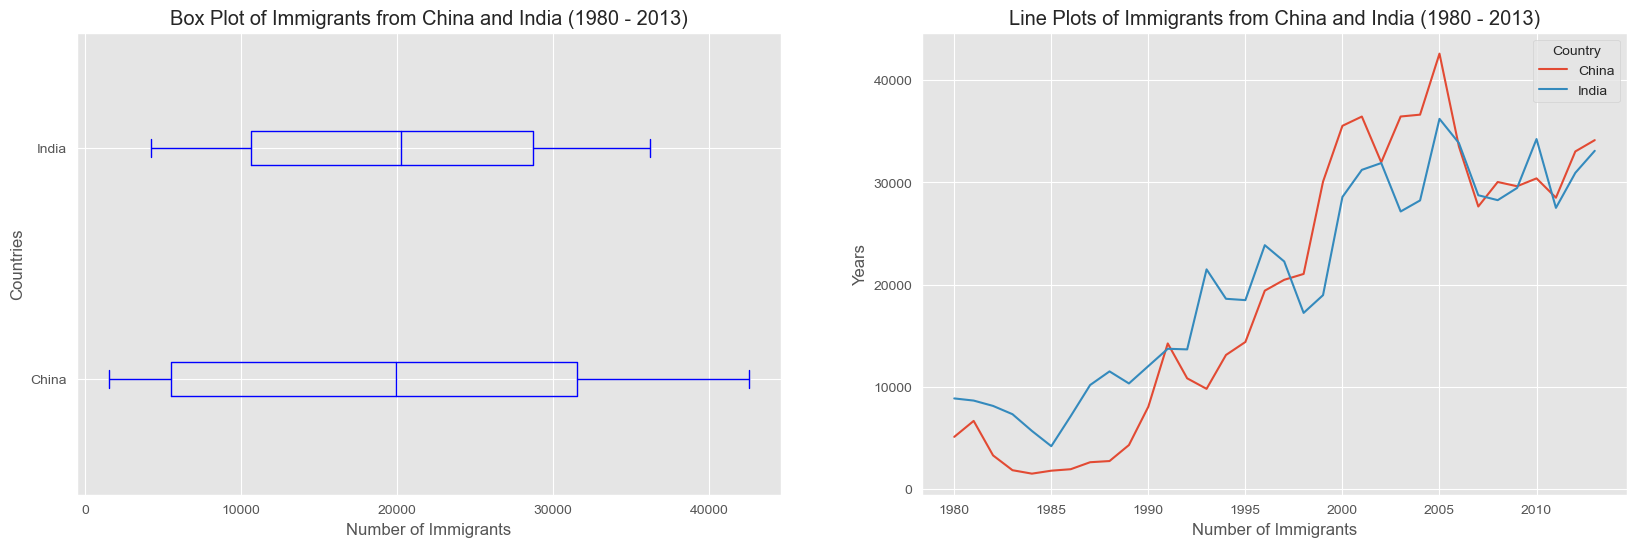

In [15]:
# subplots
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Boxplot
df_ci.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title("Box Plot of Immigrants from China and India (1980 - 2013)")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

# Lineplot
df_ci.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title("Line Plots of Immigrants from China and India (1980 - 2013)")
ax1.set_xlabel("Number of Immigrants")
ax1.set_ylabel("Years")
plt.show();

In [16]:
# Top 15 paises baseado em total de imigrantes
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [17]:
# Agrupar decadas
years_80 = list(map(str, range(1980, 1990)))
years_90 = list(map(str, range(1990, 2000)))
years_00 = list(map(str, range(2000, 2010)))

# Fazer slice para criar uma serie para cada data
df_80 = df_top15.loc[:, years_80].sum(axis=1)
df_90 = df_top15.loc[:, years_90].sum(axis=1)
df_00 = df_top15.loc[:, years_00].sum(axis=1)

# Fazer o merge das series em um novo DataFrame
new_df = pd.DataFrame({"1980s": df_80, "1990s": df_90, "2000s": df_00})

# Exibir o DataFrame
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [18]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


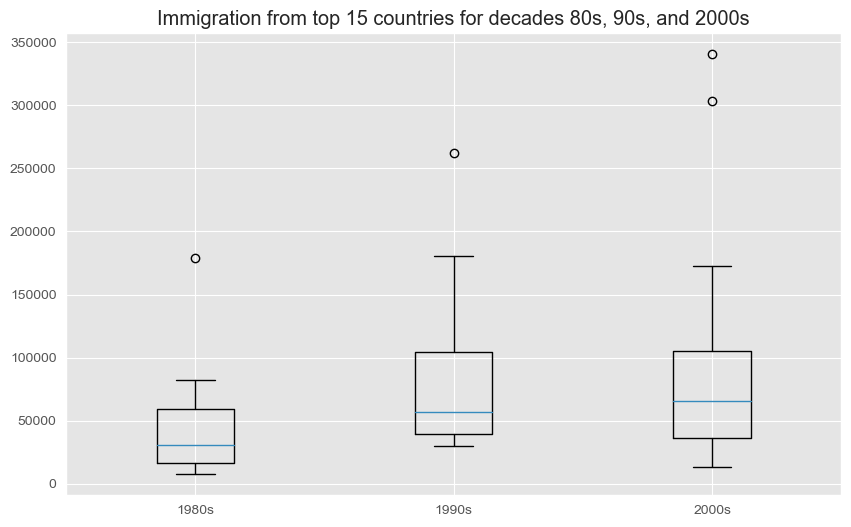

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot(new_df.values, labels=new_df.columns)
plt.title("Immigration from top 15 countries for decades 80s, 90s, and 2000s")
plt.show();

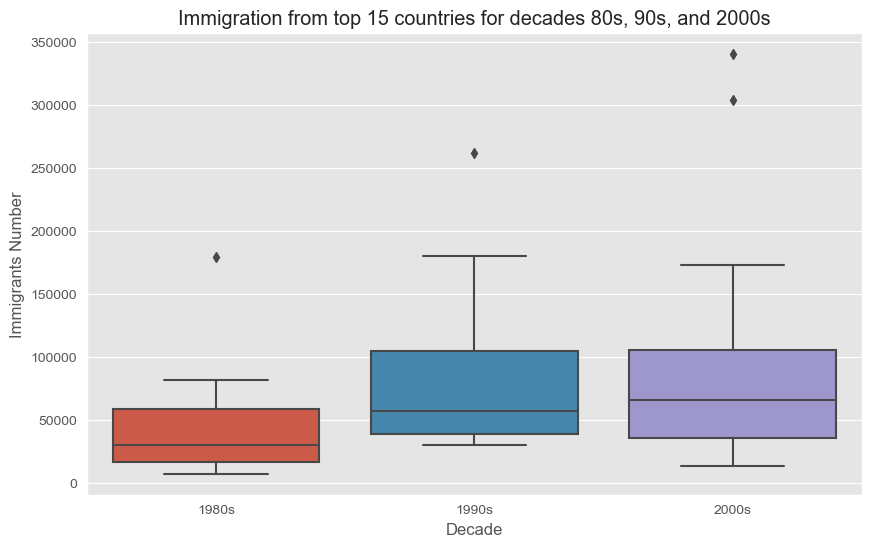

In [20]:
new_df_melt = new_df.melt(var_name="Decade", value_name="Immigrants Number")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Decade", y="Immigrants Number", data=new_df_melt)
ax.set_title("Immigration from top 15 countries for decades 80s, 90s, and 2000s")
plt.show();

# Plotagem com Matplotlib

In [21]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [22]:
df.shape

(195, 38)

In [23]:
# Criar o DataFrame com os respectivos anos
df_line = df[years]

# Aplicar uma soma para obter o total de imigrantes ano a ano
total_immigrants = df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

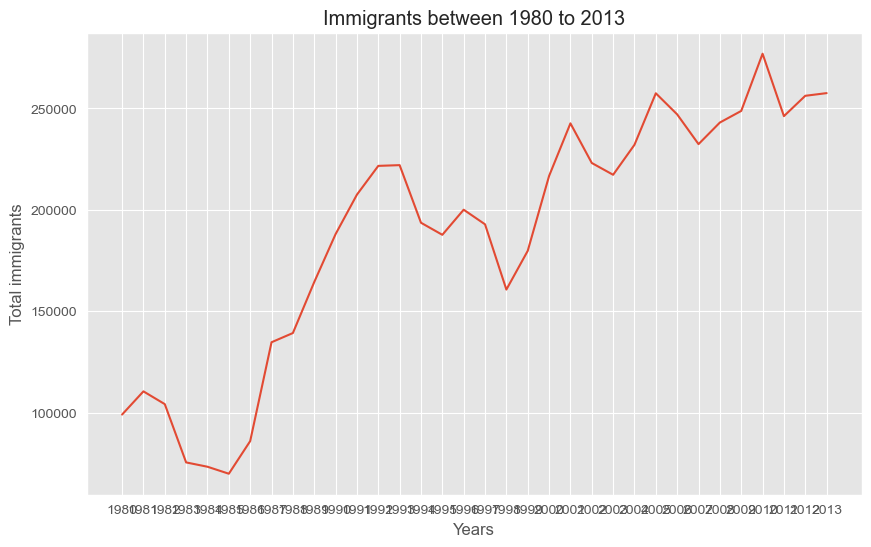

In [24]:
# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar o grafico
ax.plot(total_immigrants)

# Definir o titulo do grafico
ax.set_title("Immigrants between 1980 to 2013")

# Definir os rotulos do grafico
ax.set_xlabel("Years")
ax.set_ylabel("Total immigrants")

plt.show();

Porem podemos ver que os anos no eixo X estao sobrepostos, o que nao eh ideal.

Vamos converter o mapeamento de string para inteiro para corrigir esse problema.

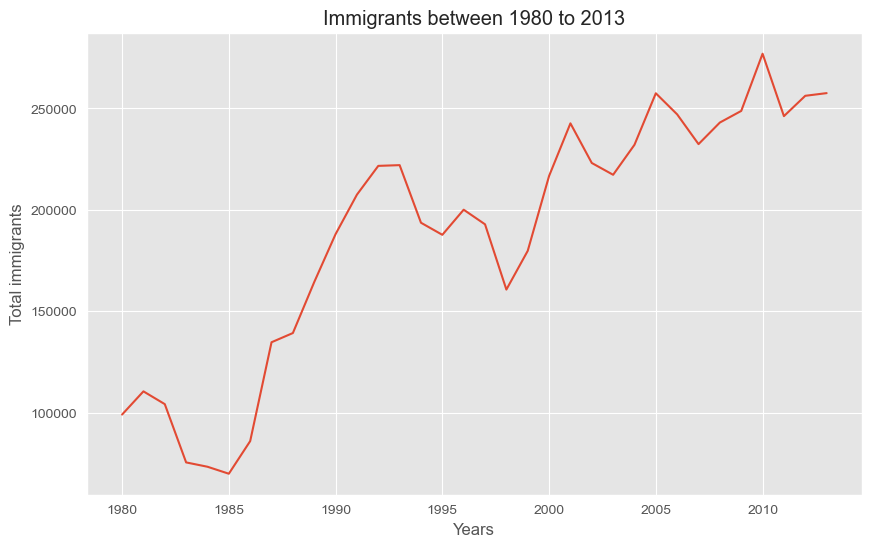

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

total_immigrants.index = total_immigrants.index.map(int)

ax.plot(total_immigrants)

ax.set_title("Immigrants between 1980 to 2013")
ax.set_xlabel("Years")
ax.set_ylabel("Total immigrants")
plt.show();

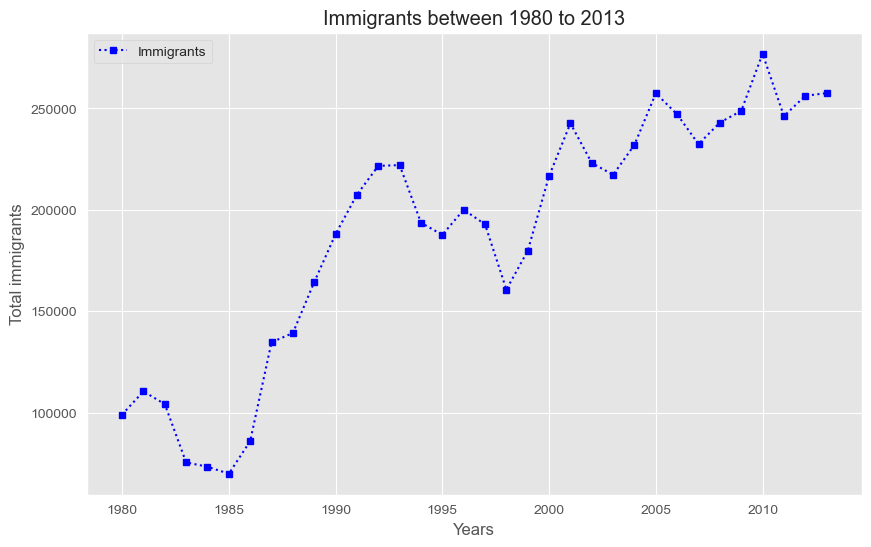

In [26]:
# Vamos melhorar a aparencia do grafico

fig, ax = plt.subplots(figsize=(10, 6))

# Mudar o mapeamento para string
total_immigrants.index = total_immigrants.index.map(int)

# Alterar a aparencia do grafico
ax.plot(total_immigrants, marker='s', # Define o marcador com o formato de quadrado
        markersize=5, # Define o tamanho do marcador
        color='blue', # Define a cor da linha
        linestyle='dotted') # Altera o tipo da linha para pontinhos

ax.set_title("Immigrants between 1980 to 2013")
ax.set_xlabel("Years")
ax.set_ylabel("Total immigrants")
ax.legend(["Immigrants"])
plt.show();

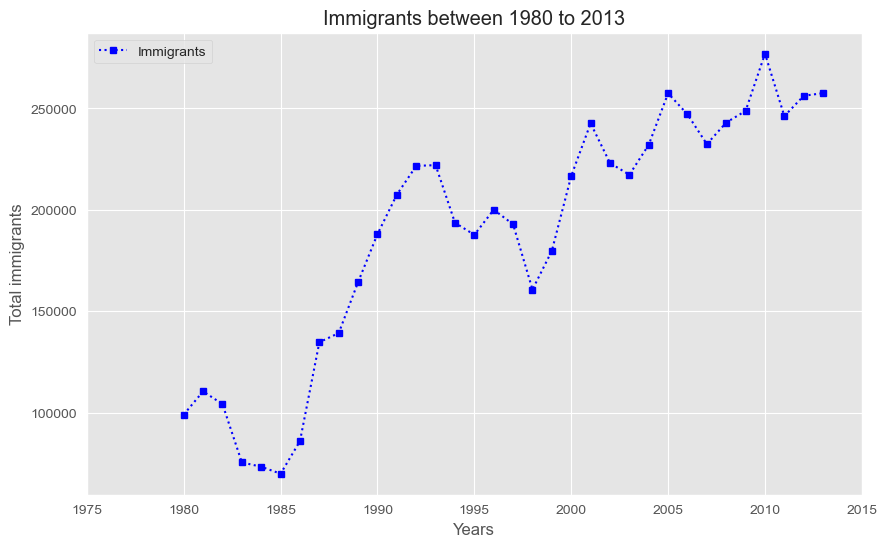

In [27]:
# Vamos incluir o grid no fundo

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(total_immigrants, marker='s', markersize=5, color='blue', linestyle='dotted')

ax.set_title("Immigrants between 1980 to 2013")
ax.set_xlabel("Years")
ax.set_ylabel("Total immigrants")

# Limite no eixo x
ax.set_xlim(1975, 2015)

# Habilitando o grid
ax.grid(True)

ax.legend(["Immigrants"])
plt.show();

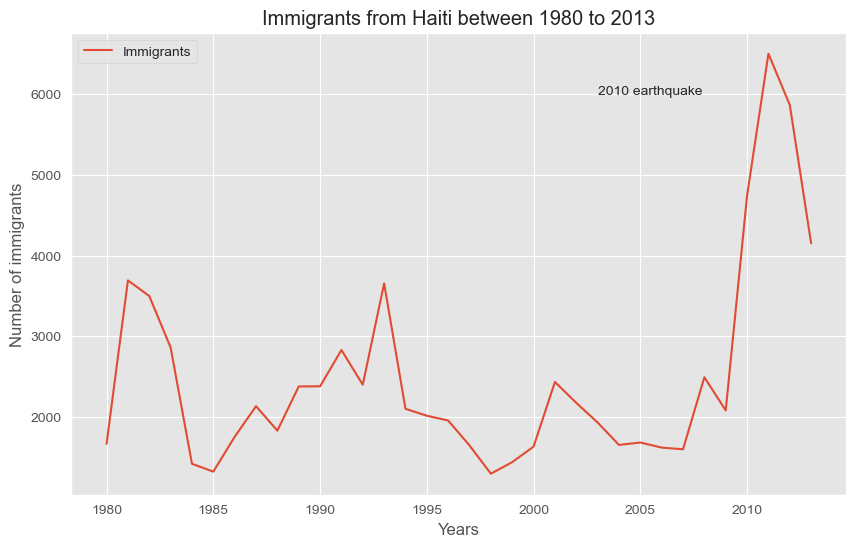

In [28]:
# plotar um grafico de linha da imigracao do Haiti
df.reset_index(inplace=True)
haiti = df[df['Country'] == 'Haiti']

# Criar o Haiti com os anos 1980 a 2013
haiti = haiti[years].T

# Converter o mapeamento para inteiro
haiti.index = haiti.index.map(int)

# Plotar o grafico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(haiti)
ax.set_title("Immigrants from Haiti between 1980 to 2013")
ax.set_xlabel("Years")
ax.set_ylabel("Number of immigrants")

ax.legend(["Immigrants"])

# Adicionar uma anotacao no topo da imigracao
ax.annotate("2010 earthquake", xy=(2003, 6000))
plt.show();